# Predicting heart disease using machine learning

# framework
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [11]:
heart_disease=pd.read_csv('6.1 heart-disease.csv.csv')
heart_disease.shape

(303, 14)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

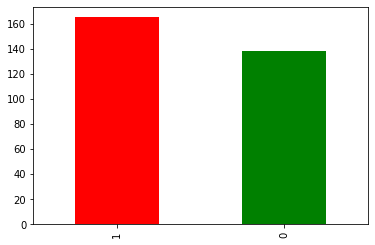

In [5]:
heart_disease['target'].value_counts().plot(kind='bar',color=['red','green']);

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart_disease['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


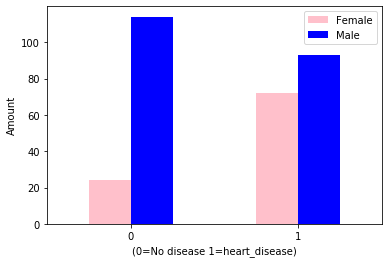

In [11]:
pd.crosstab(heart_disease.target,heart_disease.sex).plot(
kind='bar',
color=['pink','blue'],

)
plt.legend(['Female','Male'])
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.xlabel('(0=No disease 1=heart_disease)');

In [12]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
heart_disease.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


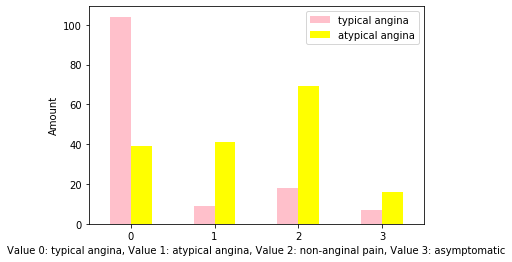

In [15]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(
kind='bar',
color=['pink','yellow','black','blue'],

)
plt.legend(['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.xlabel('Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic');

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


''

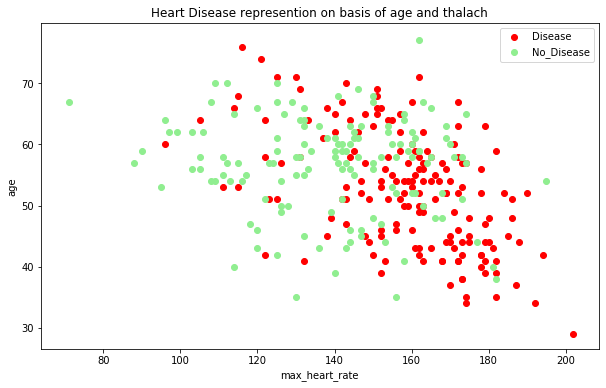

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(
heart_disease.thalach[heart_disease.target==1],
    heart_disease.age[heart_disease.target==1],
    color='red'
)
plt.scatter(
heart_disease.thalach[heart_disease.target==0],
    heart_disease.age[heart_disease.target==0],
    color='lightgreen'
)
plt.xlabel('max_heart_rate')
plt.ylabel('age')
plt.legend(['Disease','No_Disease'])
plt.title('Heart Disease represention on basis of age and thalach')
plt.savefig('thalach_vs_age.png');
;


In [18]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


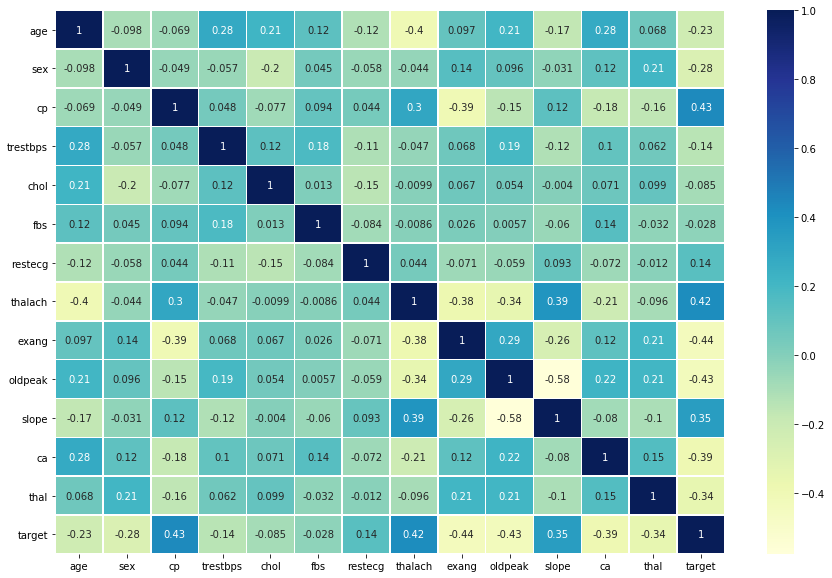

In [19]:
corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,linewidths=0.5,annot=True,cmap='YlGnBu')

# now trying to model our data
lets split and test it on three different model
1)Logistic Regression
2)KNN
3)RandomForestClassifier

In [12]:
X=heart_disease.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y=heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
np.random.seed=(10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
X_train,y_train


(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 248   54    1   1       192   283    0        0      195      0      0.0   
 260   66    0   0       178   228    1        1      165      1      1.0   
 208   49    1   2       120   188    0        1      139      0      2.0   
 258   62    0   0       150   244    0        1      154      1      1.4   
 294   44    1   0       120   169    0        1      144      1      2.8   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 94    45    0   1       112   160    0        1      138      0      0.0   
 108   50    0   1       120   244    0        1      162      0      1.1   
 39    65    0   2       160   360    0        0      151      0      0.8   
 201   60    1   0       125   258    0        0      141      1      2.8   
 112   64    0   2       140   313    0        1      133      0      0.2   
 
      slope  ca  thal  
 248      2   1     3  
 260      1   2     3  
 2

In [16]:
#write a dictionary containing all three models
# write a function to fit training data in all three models And check their respective scores
models_dict={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest Classifier":RandomForestClassifier()
}
score_of_models={}
def fit_3_models(models_dict,X_train,X_test,y_train,y_test):
    '''
    Fit them all here
    '''
    for name,model in models_dict.items():
        model.fit(X_train,y_train)
        score_of_models[name]=model.score(X_test,y_test)
    return score_of_models
results_dict=fit_3_models(models_dict,X_train,X_test,y_train,y_test)
results_dict

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7213114754098361,
 'Random Forest Classifier': 0.8688524590163934}

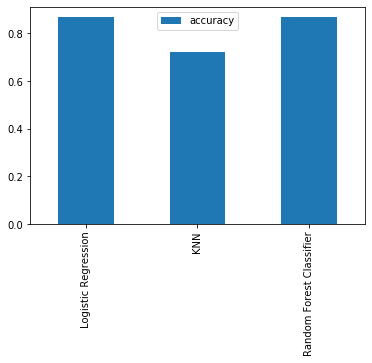

In [25]:
comparing_acuuracy=pd.DataFrame(results_dict,index=["accuracy"])
comparing_acuuracy.T.plot.bar();

In [26]:
results_dict


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7213114754098361,
 'Random Forest Classifier': 0.8688524590163934}

In [35]:
test_data=[]
train_data=[]
knn=KNeighborsClassifier()
n=range(1,21)
for i in n:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_data.append(knn.score(X_train,y_train))
    test_data.append(knn.score(X_test,y_test))

max acuuracy after tuning = 75.41


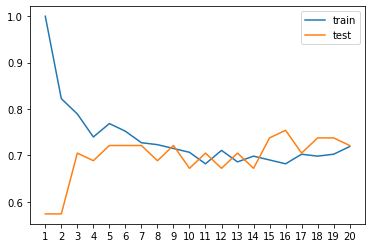

In [39]:
plt.plot(n,train_data,label="Train Score")
plt.plot(n,test_data,label="Test_score")
plt.legend(["train","test"])
plt.xticks(np.arange(1,21,1))
print(f"max acuuracy after tuning = {max(test_data)*100:.2f}")

## Randomized search for logistic regression and Random Forest Classifictaion
1. LogistisRagression

In [43]:
LR_model=LogisticRegression()

grid_for_Lr={
    "solver":['lbfgs', 'liblinear'],
    "penalty":['l1', 'l2', 'elasticnet']
}

rscv_model=RandomizedSearchCV(LR_model,param_distributions=grid_for_Lr,cv=5,verbose=2)



rscv_model.fit(X_train,y_train);

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarnin

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] solver=lbfgs, penalty=l1 ........................................
[CV] ......................... solver=lbfgs, penalty=l1, total=   0.0s
[CV] solver=lbfgs, penalty=l1 ........................................
[CV] ......................... solver=lbfgs, penalty=l1, total=   0.0s
[CV] solver=lbfgs, penalty=l1 ........................................
[CV] ......................... solver=lbfgs, penalty=l1, total=   0.0s
[CV] solver=lbfgs, penalty=l1 ........................................
[CV] ......................... solver=lbfgs, penalty=l1, total=   0.0s
[CV] solver=lbfgs, penalty=l1 ........................................
[CV] ......................... solver=lbfgs, penalty=l1, total=   0.0s
[CV] solver=liblinear, penalty=l1 ....................................
[CV] ..................... solver=liblinear, penalty=l1, total=   0.0s
[CV] solver=liblinear, penalty=l1 ....................................
[CV] ............

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

[CV] ......................... solver=lbfgs, penalty=l2, total=   0.1s
[CV] solver=lbfgs, penalty=l2 ........................................
[CV] ......................... solver=lbfgs, penalty=l2, total=   0.1s
[CV] solver=lbfgs, penalty=l2 ........................................
[CV] ......................... solver=lbfgs, penalty=l2, total=   0.0s
[CV] solver=lbfgs, penalty=l2 ........................................
[CV] ......................... solver=lbfgs, penalty=l2, total=   0.0s
[CV] solver=liblinear, penalty=l2 ....................................
[CV] ..................... solver=liblinear, penalty=l2, total=   0.0s
[CV] solver=liblinear, penalty=l2 ....................................
[CV] ..................... solver=liblinear, penalty=l2, total=   0.0s
[CV] solver=liblinear, penalty=l2 ....................................
[CV] ..................... solver=liblinear, penalty=l2, total=   0.0s
[CV] solver=liblinear, penalty=l2 ....................................
[CV] .

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn

In [44]:
rscv_model.best_params_

{'solver': 'lbfgs', 'penalty': 'l2'}

In [59]:
rscv_model.score(X_test,y_test)

Rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

## lets try on Random Forest Classifier

In [60]:

rs_cv_model=RandomizedSearchCV(RandomForestClassifier(),param_distributions=Rf_grid,cv=5,verbose=True,n_iter=20)
rs_cv_model.fit(X_train,y_train)

TypeError: 'int' object is not callable

In [51]:
rs_cv_model.score(X_test,y_test)

0.8852459016393442

In [52]:
rs_cv_model.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 3}

## GridSearch Cv


In [69]:
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":["liblinear","lbfgs"],
    "penalty":["l2"]
}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocess

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danis\Desktop\machine_learning_one\heart_disease-PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [70]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'penalty': 'l2', 'solver': 'liblinear'}

In [71]:
gs_log_reg.score(X_test,y_test)

0.8032786885245902

In [72]:
#using RandomForeestModel
y_preds=gs_log_reg.predict(X_test)

In [73]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

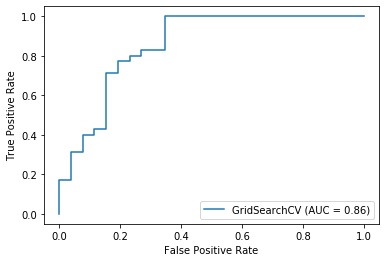

In [74]:
#ROcCURVE
plot_roc_curve(gs_log_reg,X_test,y_test)

In [75]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[17  9]
 [ 3 32]]


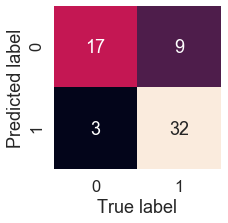

In [79]:
sns.set(font_scale=1.5)
def plot_con_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_con_mat(y_test,y_preds)

In [80]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.78      0.91      0.84        35

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



### Claculate RvaluaytionMatrix using Cross Validation
precision recall and f1 score using cross validation

In [82]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")


In [83]:
cross_val_score(clf,X_test,y_test)

array([0.92307692, 0.91666667, 0.75      , 0.66666667, 0.75      ])

In [86]:
#CV accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [87]:
#CV precision
cv_prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8207936507936507

In [89]:
#CV recal
cv_recall =cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall =np.mean(cv_recall )
cv_recall 

0.9212121212121213

In [90]:
#CV f1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

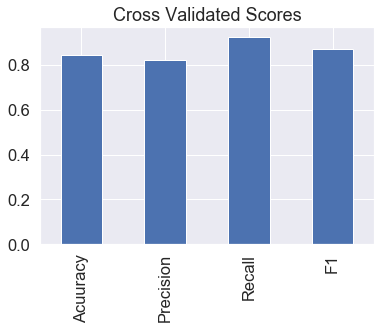

In [93]:
cv_metrics=pd.DataFrame({
    "Acuuracy":cv_acc,
    "Precision":cv_prec,
    "Recall":cv_recall,
    "F1":cv_f1},index=[0]
)
cv_metrics.T.plot.bar(title="Cross Validated Scores",legend=False);

# Features importtance

In [98]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train);
clf.score(X_test,y_test)

0.8360655737704918

In [99]:
clf.coef_

array([[ 0.00815399, -0.62816391,  0.6402279 , -0.02189505, -0.00222063,
         0.07732795,  0.24319045,  0.03331924, -0.68253975, -0.36785548,
         0.39255589, -0.54148191, -0.78775495]])

In [101]:
features_dict=dict(zip(heart_disease.columns,list(clf.coef_[0])))

In [104]:
features_dict
features_df=pd.DataFrame(features_dict,index=[0])

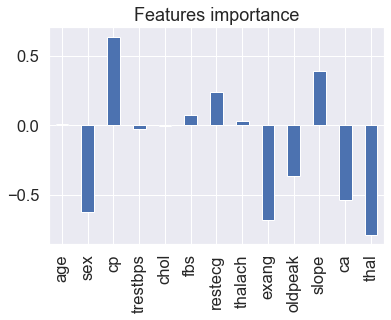

In [106]:
#visualize
features_df.T.plot.bar(title="Features importance",legend=False)

In [107]:
pd.crosstab(heart_disease['cp'],heart_disease['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
